In [5]:
from torchvision import models

In [6]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [7]:
resnet = models.resnet101(pretrained=True)
resnet

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\Dell/.cache\torch\hub\checkpoints\resnet101-5d3b4d8f.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
           mean=[0.485, 0.456, 0.406],
           std=[0.229, 0.224, 0.225]
            #mean=[0.5],
           # std=[0.5]
        )])

In [9]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

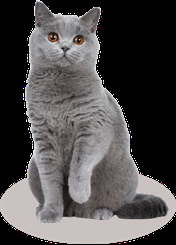

In [15]:
from PIL import Image
#img = Image.open("C:/Users/rohit/Pictures/dog.png")
img = pil_loader("cat.png")
img

In [16]:
img_t = preprocess(img)
img_t

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [ 1.3413,  1.3413,  1.3413,  ...,  1.3584,  1.3413,  1.3413],
         [ 1.3413,  1.3413,  1.3413,  ...,  1.3584,  1.3584,  1.3413],
         [ 1.3413,  1.3413,  1.3413,  ...,  1.2385,  1.3413,  1.3584]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [ 1.3431,  1.3431,  1.3431,  ...,  1.3606,  1.3431,  1.3431],
         [ 1.3431,  1.3431,  1.3431,  ...,  1.3782,  1.3606,  1.3431],
         [ 1.3431,  1.3431,  1.3431,  ...,  1.2906,  1.3606,  1.3606]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [17]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.2760e+00,  2.7494e-01, -1.3606e+00,  2.0523e-01,  3.3880e-01,
          8.2461e-01, -2.1335e+00, -2.6541e-01,  2.8485e-01, -2.6776e+00,
         -1.3025e+00, -3.1155e+00,  2.1126e-01, -1.4545e+00, -2.6928e+00,
          1.6557e+00, -1.1967e+00,  8.8391e-01,  7.7419e-01, -3.4869e+00,
         -8.5777e-01,  2.7078e+00, -2.3403e-02,  1.5386e+00,  3.3417e+00,
         -2.8170e+00, -2.8806e+00, -1.9035e+00, -1.0238e+00, -7.5827e-01,
         -3.7002e+00, -2.5924e+00, -3.9781e+00, -2.6202e+00, -2.0651e+00,
         -3.1203e+00, -1.0337e+00, -2.2208e+00,  3.9460e-01, -8.3791e-01,
         -1.0066e+00,  6.5228e-02, -2.2695e+00, -5.2279e-01, -4.7876e-01,
         -2.2307e+00, -2.3888e-02, -1.6119e+00,  1.3700e-01, -4.4846e+00,
         -2.1832e+00,  2.3575e+00, -1.9557e+00, -2.5733e+00, -2.7379e+00,
         -3.2418e+00, -3.8710e+00, -3.3244e+00, -2.9285e+00, -7.9048e-01,
         -1.6392e+00, -3.3476e+00, -3.1858e+00,  3.5961e-01, -1.2197e+00,
         -6.4889e-01,  9.2940e-01, -8.

In [18]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('281, tabby', 97.43417358398438)